# Energy Consumption of Refugees and Displaced People


## Data Set Information: [The Humanitarian Data Exchange](https://data.humdata.org)

The current literature on energy access highlights energy deprivation on a regional or country basis, but frequently neglects those outside of national energy agendas such as refugees and displaced people. To fill this gap and to help inform future analysis, we used an end-use accounting model for energy consumption for cooking and lighting by displaced populations to create this dataset. The data includes three high-level scenarios for improving access to energy for cooking and lighting. There is a strong human, economic, and environmental case to be made for improving energy access for refugees and displaced people, and for recognising energy as a core concern within humanitarian relief efforts.

## Objective:

Given the data set, we would like to predict the  Solid CO2 Emissions using regression modeling.

## Practice skills:

- Data cleaning

- Exploratory data analysis

- Advanced regression techniques such as XGBoost and Random forest

## Import Data Visualization and Manipulation Libraries

In [1]:
%matplotlib inline
# Pandas and numpy for data manipulation
import numpy as np
import pandas as pd

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
# Seaborn for data visualization
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')

## Load and Examine the Data

In [2]:
df1 = pd.read_csv('rural_consumption.csv')
df2 = pd.read_csv('slum_consumption.csv')
df3 = pd.read_csv('urban_consumption.csv')

Let's take a look at the three datasets independently

In [4]:
df1.head()

,ISO3 Country Code,Country Name,Population,Tier,Grid Expenditure ($m/yr),Grid CO2 Emissions (t/yr),Offgrid Type,Lighting Type Description,Offgrid Expenditure ($m/yr),Offgrid Capital Costs ($m),Offgrid CO2 Emissions (t/yr),Nonsolid Expenditure ($m/yr),Nonsolid CO2 Emissions (t/yr),Solid Type,Cooking Type Description,Solid Expenditure ($m/yr),Solid Capital Costs ($m),Solid CO2_Emissions (t/yr),Info
0,#country+code,#country+name,#population+num,#indicator+tier,#indicator+value+grid+expenditure,#indicator+value+grid+co2_emissions,#indicator+type+offgrid,#indicator+text+lighting,#indicator+value+offgrid+expenditure,#indicator+value+offgrid+capital_costs,#indicator+value+offgrid+co2_emissions,#indicator+value+nonsolid+expenditure,#indicator+value+nonsolid+co2_emissions,#indicator+type+solid,#indicator+text+cooking,#indicator+value+solid+expenditure,#indicator+value+solid+capital_costs,#indicator+value+solid+co2_emissions,#meta+info
1,AFG,Afghanistan,451316,Baseline,0.6934471076574069,1386.894215314814,1,Torch dependent,0.3731009312540767,0.016414560585594172,108.65079858021116,0.48742133177351094,801.5373011386625,1,Firewood dependent,8.292190759239094,0.12751636205700484,227572.7214692064,NaN
2,AFG,Afghanistan,451316,Target 1,0.6934471076574069,1386.894215314814,1,Solar dependent,0.09475711581011302,0.4845654808004268,230.33383053652202,0.48742133177351094,801.5373011386625,1,Firewood dependent,3.3475272292445544,4.306260720270337,88570.84288429677,NaN
3,AFG,Afghanistan,451316,Target 2,0.6934471076574069,1386.894215314814,3,Solar dependent,0.018094033886868574,1.9532258274742884,69.1001491609566,0.48742133177351094,801.5373011386625,7,LPG II,6.934368403184112,4.287502455415142,97456.5975421507,NaN
4,AFG,Afghanistan,451316,Target 3,0.6934471076574069,1386.894215314814,7,NaN,0.10174616157746406,5.608582392295799,388.5631576476627,0.48742133177351094,801.5373011386625,8,NaN,22.716724563919392,6.859663760791917,20147.880045574617,NaN


In [5]:
df2.head()

,ISO3 Country Code,Country Name,Population,Tier,Grid Expenditure ($m/yr),Grid CO2 Emissions (t/yr),Offgrid Type,Lighting Type Description,Offgrid Expenditure ($m/yr),Offgrid Capital Costs ($m),Offgrid CO2 Emissions (t/yr),Nonsolid Expenditure ($m/yr),Nonsolid CO2 Emissions (t/yr),Solid Type,Cooking Type Description,Solid Expenditure ($m/yr),Solid Capital Costs ($m),Solid CO2_Emissions (t/yr),Info
0,#country+code,#country+name,#population+num,#indicator+tier,#indicator+value+grid+expenditure,#indicator+value+grid+co2_emissions,#indicator+type+offgrid,#indicator+text+lighting,#indicator+value+offgrid+expenditure,#indicator+value+offgrid+capital_costs,#indicator+value+offgrid+co2_emissions,#indicator+value+nonsolid+expenditure,#indicator+value+nonsolid+co2_emissions,#indicator+type+solid,#indicator+text+cooking,#indicator+value+solid+expenditure,#indicator+value+solid+capital_costs,#indicator+value+solid+co2_emissions,#meta+info
1,AFG,Afghanistan,1030084,Baseline,1.6809680809932062,3361.9361619864126,1,Torch dependent,0.4711531255245888,0.020728362960715382,137.2045981492031,14.684875350525715,24148.461687531173,1,Firewood dependent,6.773550879959821,0.10416289150826992,185894.83195922553,NaN
2,AFG,Afghanistan,1030084,Target 1,1.6809680809932062,3361.9361619864126,1,Solar dependent,0.11965960827159519,0.61191093796808,290.8663449500504,14.684875350525715,24148.461687531173,1,Firewood dependent,2.7344578372217256,3.5176079443932275,72349.8925889113,NaN
3,AFG,Afghanistan,1030084,Target 2,1.6809680809932062,3361.9361619864126,3,Solar dependent,0.02284920756024729,2.4665402211048675,87.25990348501513,14.684875350525715,24148.461687531173,7,LPG II,5.664401430589302,3.5022850864048425,79608.3014978902,NaN
4,AFG,Afghanistan,1030084,Target 3,1.6809680809932062,3361.9361619864126,7,NaN,0.1284853990479774,7.082536929110032,490.67887762716344,14.684875350525715,24148.461687531173,8,NaN,18.55636153670212,5.603378269050364,16457.97770148619,NaN


In [6]:
df3.head()

,ISO3 Country Code,Country Name,Population,Tier,Grid Expenditure ($m/yr),Grid CO2 Emissions (t/yr),Offgrid Type,Lighting Type Description,Offgrid Expenditure ($m/yr),Offgrid Capital Costs ($m),Offgrid CO2 Emissions (t/yr),Nonsolid Expenditure ($m/yr),Nonsolid CO2 Emissions (t/yr),Solid Type,Cooking Type Description,Solid Expenditure ($m/yr),Solid Capital Costs ($m),Solid CO2_Emissions (t/yr),Info
0,#country+code,#country+name,#population+num,#indicator+tier,#indicator+value+grid+expenditure,#indicator+value+grid+co2_emissions,#indicator+type+offgrid,#indicator+text+lighting,#indicator+value+offgrid+expenditure,#indicator+value+offgrid+capital_costs,#indicator+value+offgrid+co2_emissions,#indicator+value+nonsolid+expenditure,#indicator+value+nonsolid+co2_emissions,#indicator+type+solid,#indicator+text+cooking,#indicator+value+solid+expenditure,#indicator+value+solid+capital_costs,#indicator+value+solid+co2_emissions,#meta+info
1,AFG,Afghanistan,612793,Baseline,1.0584468873622295,2116.893774724459,1,Torch dependent,0.05398125124150834,0.0023749029947784076,15.719891226309588,8.735978478063942,14365.831275038481,2,Firewood/charcoal mix,3.482950668921701,0.24050767851060237,119483.3030012477,NaN
2,AFG,Afghanistan,612793,Target 1,1.0584468873622295,2116.893774724459,1,Solar dependent,0.013709715647916983,0.07010824356328732,33.325321204153774,8.735978478063942,14365.831275038481,2,Firewood/charcoal mix,1.8198380762532909,2.103185520502008,66093.78016464974,NaN
3,AFG,Afghanistan,612793,Target 2,1.0584468873622295,2116.893774724459,3,Solar dependent,0.002617893731694474,0.28259799237137534,9.997596361246133,8.735978478063942,14365.831275038481,7,LPG II,3.36973163255153,2.0834965506044756,47358.6865370224,NaN
4,AFG,Afghanistan,612793,Target 3,1.0584468873622295,2116.893774724459,7,NaN,0.014720909681224973,0.8114648607538456,56.21836795118723,8.735978478063942,14365.831275038481,8,NaN,11.039111408596316,3.333429177600934,9790.790562447126,NaN


We will delete the first row in each dataframe. We will also delete the last column as it contains no useful information

In [10]:
# Delete the first row
df1 = df1.drop(df1.index[0])
df2 = df2.drop(df2.index[0])
df3 = df3.drop(df3.index[0])

In [11]:
## Delete the first and last column as we don't need them
df1 = df1.drop(['ISO3 Country Code', 'Info'], axis = 1)
df2 = df2.drop(['ISO3 Country Code', 'Info'], axis = 1)
df3 = df3.drop(['ISO3 Country Code', 'Info'], axis = 1)

## Concatenate the Data Sets

In [12]:
df = pd.concat([df1, df2, df3], sort = False, ignore_index = True)

In [13]:
# A look at the data
df.head()

,Country Name,Population,Tier,Grid Expenditure ($m/yr),Grid CO2 Emissions (t/yr),Offgrid Type,Lighting Type Description,Offgrid Expenditure ($m/yr),Offgrid Capital Costs ($m),Offgrid CO2 Emissions (t/yr),Nonsolid Expenditure ($m/yr),Nonsolid CO2 Emissions (t/yr),Solid Type,Cooking Type Description,Solid Expenditure ($m/yr),Solid Capital Costs ($m),Solid CO2_Emissions (t/yr)
0,Afghanistan,451316,Baseline,0.6934471076574069,1386.894215314814,1,Torch dependent,0.3731009312540767,0.016414560585594172,108.65079858021116,0.48742133177351094,801.5373011386625,1,Firewood dependent,8.292190759239094,0.12751636205700484,227572.7214692064
1,Afghanistan,451316,Target 1,0.6934471076574069,1386.894215314814,1,Solar dependent,0.09475711581011302,0.4845654808004268,230.33383053652202,0.48742133177351094,801.5373011386625,1,Firewood dependent,3.3475272292445544,4.306260720270337,88570.84288429677
2,Afghanistan,451316,Target 2,0.6934471076574069,1386.894215314814,3,Solar dependent,0.018094033886868574,1.9532258274742884,69.1001491609566,0.48742133177351094,801.5373011386625,7,LPG II,6.934368403184112,4.287502455415142,97456.5975421507
3,Afghanistan,451316,Target 3,0.6934471076574069,1386.894215314814,7,NaN,0.10174616157746406,5.608582392295799,388.5631576476627,0.48742133177351094,801.5373011386625,8,NaN,22.716724563919392,6.859663760791917,20147.880045574617
4,Angola,7458,Baseline,0.0010359340257641676,1.6367757607073845,1,Torch dependent,0.04901978964715177,0.0021566236898730947,14.275062979593708,0.014517792431945767,23.873703110310817,1,Firewood dependent,0.12837158171924035,0.001974083516361739,3523.05814704085


In [14]:
# Column names
df.columns

Index(['Country Name', 'Population', 'Tier', 'Grid Expenditure ($m/yr)',
       'Grid CO2 Emissions (t/yr)', 'Offgrid Type',
       'Lighting Type Description', 'Offgrid Expenditure ($m/yr)',
       'Offgrid Capital Costs ($m)', 'Offgrid CO2 Emissions (t/yr)',
       'Nonsolid Expenditure ($m/yr)', 'Nonsolid CO2 Emissions (t/yr)',
       'Solid Type', 'Cooking Type Description', 'Solid Expenditure ($m/yr)',
       'Solid Capital Costs ($m)', 'Solid CO2_Emissions (t/yr)'],
      dtype='object')

## Data Shape

In [8]:
df.shape

(1668, 17)

## Data Types and Missing Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 17 columns):
Country Name                     1668 non-null object
Population                       1668 non-null object
Tier                             1668 non-null object
Grid Expenditure ($m/yr)         1668 non-null object
Grid CO2 Emissions (t/yr)        1668 non-null object
Offgrid Type                     1668 non-null object
Lighting Type Description        1251 non-null object
Offgrid Expenditure ($m/yr)      1668 non-null object
Offgrid Capital Costs ($m)       1668 non-null object
Offgrid CO2 Emissions (t/yr)     1668 non-null object
Nonsolid Expenditure ($m/yr)     1668 non-null object
Nonsolid CO2 Emissions (t/yr)    1668 non-null object
Solid Type                       1668 non-null object
Cooking Type Description         1251 non-null object
Solid Expenditure ($m/yr)        1668 non-null object
Solid Capital Costs ($m)         1668 non-null object
Solid CO2_Emissions (t/yr)   

- There are missing values in few attributes

- All the attributes are objects including numerical ones

## Categorical Attributes

In [11]:
df['Country Name'].value_counts().head()

Libya                  12
Angola                 12
Belarus                12
Lebanon                12
Republic of Moldova    12
Name: Country Name, dtype: int64

In [13]:
df['Tier'].value_counts()

Target 1    417
Target 2    417
Target 3    417
Baseline    417
Name: Tier, dtype: int64

In [14]:
df['Lighting Type Description'].value_counts()

Solar dependent    834
Torch dependent    417
Name: Lighting Type Description, dtype: int64

In [15]:
df['Cooking Type Description'].value_counts()

Firewood dependent       556
LPG II                   417
Firewood/charcoal mix    278
Name: Cooking Type Description, dtype: int64

## Convert Numerical Attributes

Let's convert attributes with numbers to the correct format

In [16]:
num_att = ['Population', 'Grid Expenditure ($m/yr)', 
           'Grid CO2 Emissions (t/yr)', 'Offgrid Type',
          'Offgrid Expenditure ($m/yr)', 'Offgrid Capital Costs ($m)',
          'Offgrid CO2 Emissions (t/yr)', 'Nonsolid Expenditure ($m/yr)',
          'Nonsolid CO2 Emissions (t/yr)', 'Solid Type',
          'Solid Expenditure ($m/yr)', 'Solid Capital Costs ($m)',
          'Solid CO2_Emissions (t/yr)']
df[num_att] = df[num_att].apply(pd.to_numeric, errors = 'coerce')

In [17]:
# Re-check for data types and possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 17 columns):
Country Name                     1668 non-null object
Population                       1668 non-null int64
Tier                             1668 non-null object
Grid Expenditure ($m/yr)         1668 non-null float64
Grid CO2 Emissions (t/yr)        1668 non-null float64
Offgrid Type                     1668 non-null int64
Lighting Type Description        1251 non-null object
Offgrid Expenditure ($m/yr)      1668 non-null float64
Offgrid Capital Costs ($m)       1668 non-null float64
Offgrid CO2 Emissions (t/yr)     1668 non-null float64
Nonsolid Expenditure ($m/yr)     1668 non-null float64
Nonsolid CO2 Emissions (t/yr)    1668 non-null float64
Solid Type                       1668 non-null int64
Cooking Type Description         1251 non-null object
Solid Expenditure ($m/yr)        1668 non-null float64
Solid Capital Costs ($m)         1668 non-null float64
Solid CO2_Emissions (t/

Let's look at the statistical description of numerical attributes

In [18]:
df.describe()

,Population,Grid Expenditure ($m/yr),Grid CO2 Emissions (t/yr),Offgrid Type,Offgrid Expenditure ($m/yr),Offgrid Capital Costs ($m),Offgrid CO2 Emissions (t/yr),Nonsolid Expenditure ($m/yr),Nonsolid CO2 Emissions (t/yr),Solid Type,Solid Expenditure ($m/yr),Solid Capital Costs ($m),Solid CO2_Emissions (t/yr)
count,1.668000e+03,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,1.366707e+05,1.636116,2653.846169,3.000000,0.061195,0.839550,82.952213,4.480498,7367.930207,4.416667,0.892857,0.340250,9747.825677
std,4.827987e+05,5.331287,9516.514376,2.450224,0.473475,7.087789,556.450711,27.449366,45138.956869,3.122323,4.471728,1.613343,47037.669552
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.894000e+03,0.012069,13.437274,1.000000,0.000000,0.000000,0.000000,0.011102,18.256808,1.000000,0.003615,0.001055,39.273870
50%,8.157000e+03,0.080853,100.551930,2.000000,0.000006,0.000011,0.009988,0.082930,136.373792,4.500000,0.030112,0.008847,313.419617
75%,6.288400e+04,0.952256,1157.698568,4.000000,0.003217,0.017806,5.565393,0.731127,1202.297172,7.250000,0.224510,0.077333,2287.376891
max,5.591334e+06,62.141711,124283.421306,7.000000,11.164526,167.829025,11627.211900,392.444953,645353.922292,8.000000,93.167728,28.133426,933340.254144


## Correlation Matrix

In [19]:
corr_matrix = df.corr()

Let's look at the correlation of attributes with the target variable

In [20]:
corr_matrix['Solid CO2_Emissions (t/yr)'].sort_values(ascending=False)

Solid CO2_Emissions (t/yr)       1.000000
Offgrid Expenditure ($m/yr)      0.858462
Solid Expenditure ($m/yr)        0.470040
Offgrid CO2 Emissions (t/yr)     0.433771
Population                       0.406150
Solid Capital Costs ($m)         0.380143
Offgrid Capital Costs ($m)       0.188181
Grid Expenditure ($m/yr)         0.112710
Nonsolid Expenditure ($m/yr)     0.103893
Nonsolid CO2 Emissions (t/yr)    0.103893
Grid CO2 Emissions (t/yr)        0.089135
Solid Type                      -0.106478
Offgrid Type                    -0.109729
Name: Solid CO2_Emissions (t/yr), dtype: float64

- We can see that Offgrid Expenditure is correlated with the target variable

Let's look at the correlation between attributes

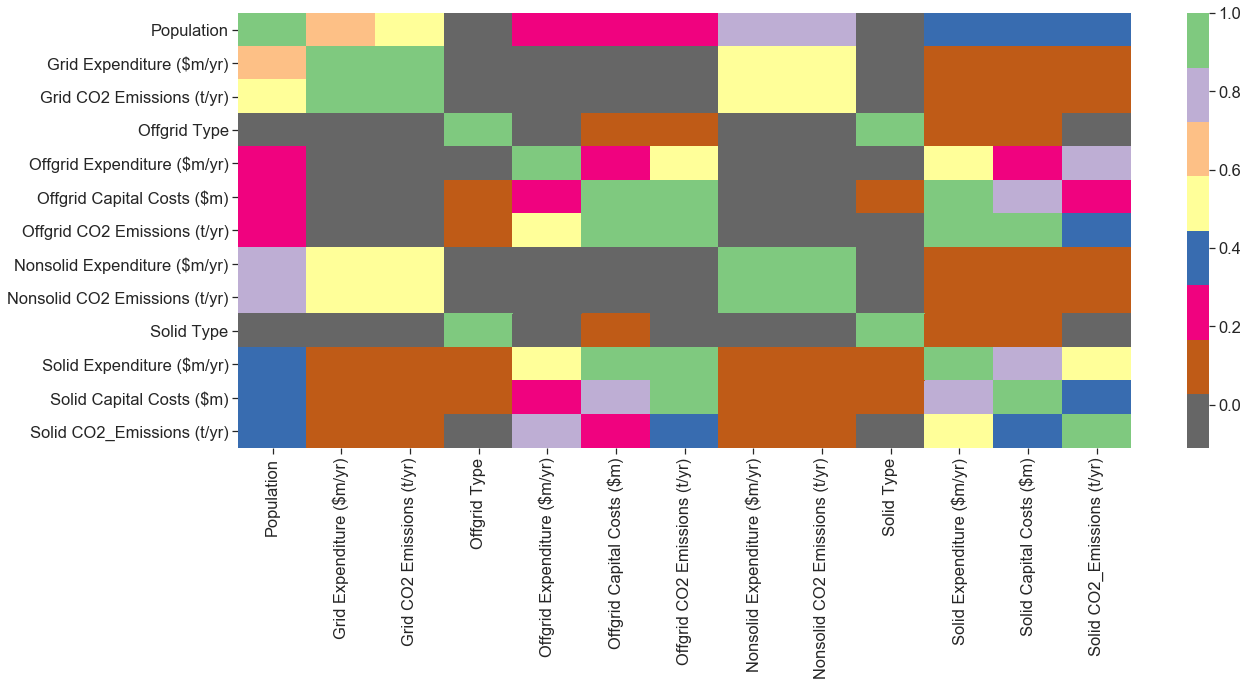

In [21]:
plt.figure(figsize = (20,8))
sns.heatmap(corr_matrix,  xticklabels = corr_matrix.columns, yticklabels=corr_matrix.columns,
          fmt="g", cmap='Accent_r')  

- There are some in-between predictor correlation

# Exploratory Data Analysis

Let's look at the histogram  of the few attributes

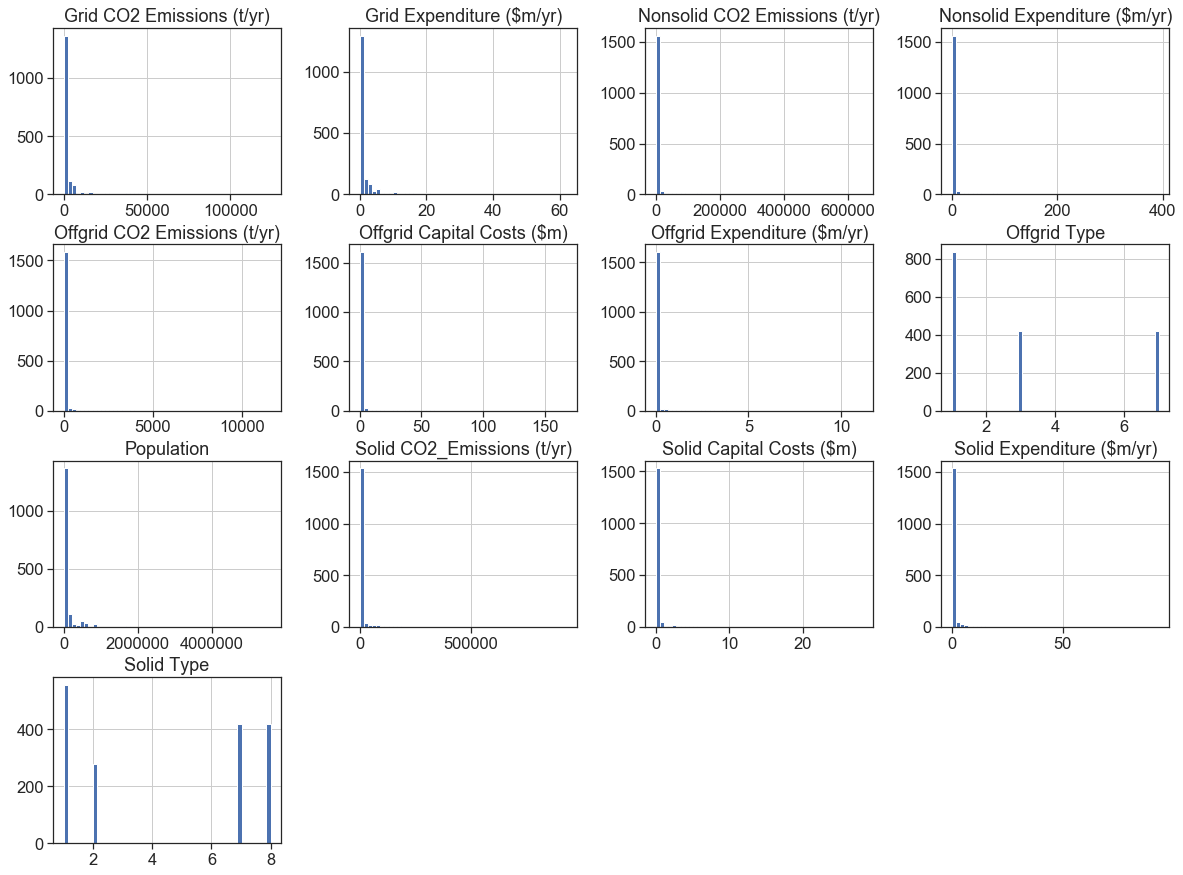

In [22]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

- The numerical attributes are highly skewed

Let's look at the bar plot of categorical attributes with the target variable

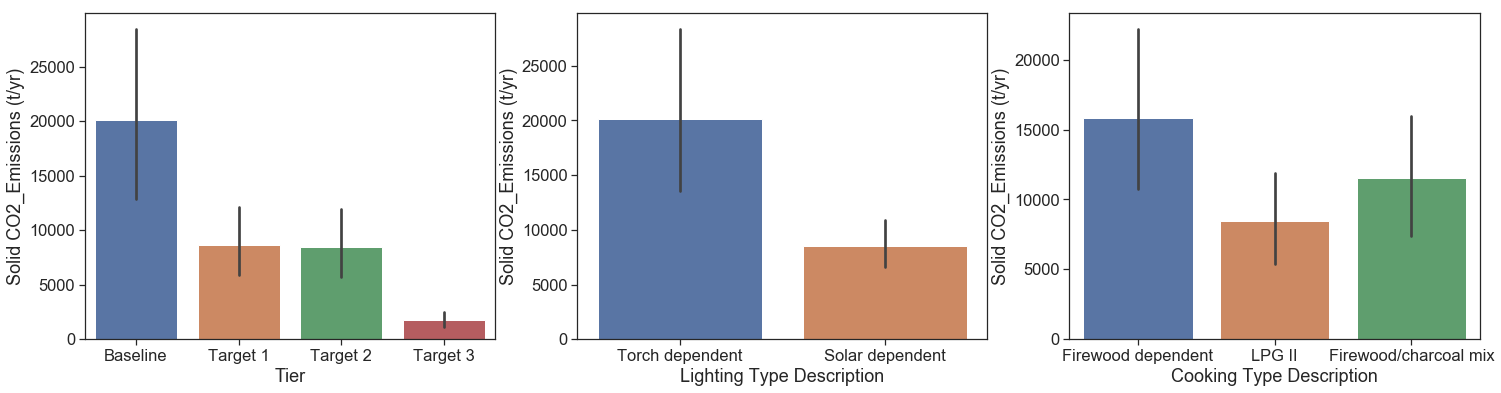

In [23]:
# Set figure size
fig, ax = plt.subplots(1,3, figsize =(25,6))

sns.barplot(data=df, x= 'Tier', y = 'Solid CO2_Emissions (t/yr)', ax = ax[0])
sns.barplot(data=df, x= 'Lighting Type Description', y = 'Solid CO2_Emissions (t/yr)', ax = ax[1])
sns.barplot(data=df, x= 'Cooking Type Description', y = 'Solid CO2_Emissions (t/yr)', ax = ax[2])

# Prepare the Data for Machine Learning Algorithms

###  Logarithm transformation of target variable

Text(0,0.5,'Distribution')

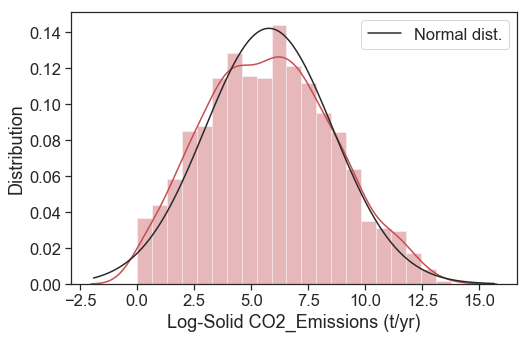

In [24]:
# Import normal distribution from scipy
from scipy.stats import norm

# Log(1+x) transformation
df['Log-Solid CO2_Emissions (t/yr)'] = np.log1p(df['Solid CO2_Emissions (t/yr)']) 

# Set figure size
fig = plt.figure(figsize = (8,5))

sns.distplot(df['Log-Solid CO2_Emissions (t/yr)'],  fit = norm, color = 'r')
plt.legend(['Normal dist.'],loc='best')
plt.ylabel('Distribution')

In [25]:
# Now we drop the untransformed target variable
df = df.drop('Solid CO2_Emissions (t/yr)', axis = 1)

Let's also log-transform other  numerical attributes

In [26]:
num_att = list(df.select_dtypes('number'))

for col in num_att:
    if col == 'Log-Solid CO2_Emissions (t/yr)':
        next
    else:
        df[col] = np.log1p(df[col])

Now we will separate the feature matrix from the target variable. We will also drop the Country Names due to too many categories

In [70]:
# Feature matrix
X = df.drop(['Log-Solid CO2_Emissions (t/yr)', 'Country Name'], axis =1)

# Target variable
y = df['Log-Solid CO2_Emissions (t/yr)']

In [28]:
print(X.shape)
print(y.shape)

(1668, 15)
(1668,)


## Create a Test Set

In [71]:
# import train test split library
from sklearn.model_selection import train_test_split

# Create a 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [30]:
print('Training  set size:', X_train.shape)
print('Test set size:', X_test.shape)
print('Training target variable size', y_train.shape)
print('Test target variable size', y_test.shape)

Training  set size: (1334, 15)
Test set size: (334, 15)
Training target variable size (1334,)
Test target variable size (334,)


## Impute Missing Values
Only two categorical attributes have missing values. We will impute them with the mode

In [31]:
from sklearn.base import TransformerMixin

# This is based on some nice code by 'sveitser' at http://stackoverflow.com/a/25562948
"""Impute missing categorical and numerical  values (if any).Columns of dtype object are imputed with the most
frequent value in column. Columns of other types (if any) are imputed with median of column"""
  
class DataFrameImputer(TransformerMixin):
    
    def fit(self, X, y= None):
        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O')
                             else X[c].median() for c in X.columns], index = X.columns)
        return self
    
    def transform(self, X, y= None):
        return X.fillna(self.fill)

In [32]:
# Instantiate the imputer class
imputer = DataFrameImputer()

# Fit transform the training set
X_train_imputed = imputer.fit_transform(X_train)

# Only transform the test set
X_test_imputed = imputer.fit_transform(X_test)

In [33]:
# Cross-check for missing values
print(X_train_imputed.isnull().sum())
print('***********************************')
print(X_test_imputed.isnull().sum())

Population                       0
Tier                             0
Grid Expenditure ($m/yr)         0
Grid CO2 Emissions (t/yr)        0
Offgrid Type                     0
Lighting Type Description        0
Offgrid Expenditure ($m/yr)      0
Offgrid Capital Costs ($m)       0
Offgrid CO2 Emissions (t/yr)     0
Nonsolid Expenditure ($m/yr)     0
Nonsolid CO2 Emissions (t/yr)    0
Solid Type                       0
Cooking Type Description         0
Solid Expenditure ($m/yr)        0
Solid Capital Costs ($m)         0
dtype: int64
***********************************
Population                       0
Tier                             0
Grid Expenditure ($m/yr)         0
Grid CO2 Emissions (t/yr)        0
Offgrid Type                     0
Lighting Type Description        0
Offgrid Expenditure ($m/yr)      0
Offgrid Capital Costs ($m)       0
Offgrid CO2 Emissions (t/yr)     0
Nonsolid Expenditure ($m/yr)     0
Nonsolid CO2 Emissions (t/yr)    0
Solid Type                       0
Cookin

##  Feature Scaling and Handling Categorical Attributes

In [34]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [67]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Numerical attributes list
num_list = list(X.select_dtypes('number'))

# Categorical attributes list
cat_list = list(X.select_dtypes('O'))

# Standardize the numerical attributes
num_attribs = [([num], StandardScaler()) for num in num_list]

# Binarize the categorical attributes
cat_attribs = [([cat], LabelBinarizer()) for cat in cat_list]

# Build a pipeline for the data pre-processing
mapper =  DataFrameMapper(num_attribs + cat_attribs, df_out = True)

# Fit transform the training set
X_train_scaled = mapper.fit_transform(X_train_imputed)

# Only transform the test set
X_test_scaled = mapper.transform(X_test_imputed)

In [68]:
print('Training set size after pre-processing:', X_train_scaled.shape)
print('Test set size after pre-processing:', X_test_scaled.shape)

Training set size after pre-processing: (1334, 20)
Test set size after pre-processing: (334, 20)


Let's convert the feature matrix and the target variable to numpy arrays

In [72]:
X_train_prepared = X_train_scaled.values
X_test_prepared = X_test_scaled.values
y_train = y_train.values
y_test = y_test.values

# Machine Learning Algorithms

In [73]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict
# Performance Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
# Test prediction function
def Test_prediction(model, n_training_samples, n_training_label, n_test_samples, n_test_label):

    model.fit(n_training_samples, n_training_label)
    test_pred = model.predict(n_test_samples)
    mae = mean_absolute_error(n_test_label, test_pred)
    
    return print('Test mae score:', mae), test_pred

In [86]:
# Diagnostic plot
def Diagnostic_Plot(y_pred, y_true):
    
    fig, ax = plt.subplots(1,2, figsize = (20,5))
    
    residual = y_pred-y_true
    ax[0].scatter(y_pred, residual, color = 'b')
    ax[0].set_xlim([-0.1,14])
    ax[0].hlines(y=0, xmin=-0.1, xmax=14, lw=2, color='r')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title('Residual plot')


    ax[1].scatter(y_pred, y_true, color = 'b')
    ax[1].plot([-0.3,14], [-0.3,14], color = 'r')
    ax[1].set_xlim([-0.3,14])
    ax[1].set_ylim([-0.3,14])
    ax[1].set_xlabel('Predicted values')
    ax[1].set_ylabel('Actual values')
    ax[1].set_title('Residual plot')

## 1. Model Selection by Cross-validation

In [75]:
models = []

models.append(('lin_reg',  LinearRegression()))
models.append(('rig_reg',  Ridge()))
models.append(('svr_reg',  SVR()))
models.append(('forest_reg',  RandomForestRegressor(random_state = 42)))
models.append(('xgb_reg',  xgb.XGBRegressor()))

names = []
mae_scores = []

for name, model in models:
    score = cross_val_score(model, X_train_prepared, y_train, cv = 10,
                            scoring = 'neg_mean_absolute_error')
    mae_score = -score
    names.append(name)
    mae_scores.append(mae_score)
    print('%s mae: %f (%f)'%(name, mae_score.mean(), mae_score.std()))

lin_reg mae: 0.633237 (0.055950)
rig_reg mae: 0.633704 (0.055812)
svr_reg mae: 0.428814 (0.058878)
forest_reg mae: 0.061778 (0.006531)
xgb_reg mae: 0.089095 (0.006876)


Box plot of model performance on cross-validation set

Text(0,0.5,'MAE(Cross Validation)')

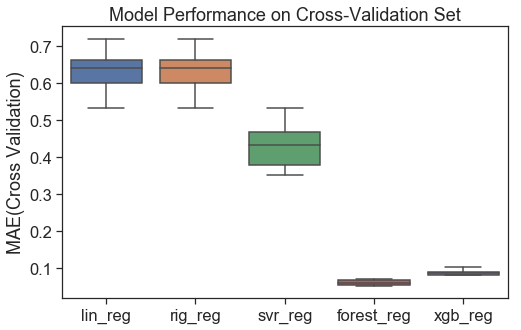

In [41]:
# Set figure size
plt.figure(figsize = (8,5))

# Display box plots
sns.boxplot(x = names, y = mae_scores)

plt.title('Model Performance on Cross-Validation Set')
plt.ylabel('MAE(Cross Validation)')

- We can see that Random forest regressor outperfomed other models

## 2. Hyperparameter Tuning

We will tune the hyperparameters of Random forest and XGBoost regressors

In [42]:
# Import grid and randomize search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### A. Random forest

In [59]:
params = {'n_estimators': [10, 20, 50, 100, 150],'max_features': ['auto', 'sqrt', 'log2', None],
          'max_depth': [10, 20, 30, None],'min_samples_split': range(2,10,1),
          'min_samples_leaf': range(1,10,2),'bootstrap': [True, False]}
          
               
rf =  RandomForestRegressor(random_state = 42)
                         
rsearch_rf = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter=200,
                                  scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, 
                                  random_state = 42, verbose = 1)  
                                                        
rsearch_rf.fit(X_train_prepared, y_train)
print('\n')
print('Best mae score:', -rsearch_rf.best_score_) 
print('Best hyperparameters:', rsearch_rf.best_params_) 

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1889 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.2min finished




Best mae score: 0.0523202240787
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


### B. XGBoost

In [76]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective = 'reg:linear')
                         
params = {'max_depth': range(1,10,2), 'min_child_weight': range(1,6,2),'gamma':[i/100 for i in range(0,6)],
         'subsample':[i/10 for i in range(5,9)],'colsample_bytree': [i/10 for i in range(5,9)],
         'learning_rate': [0.01, 0.02, 0.05, 0.1], 'n_estimators': [1000, 3000, 5000] }
              
rsearch_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params, n_iter = 100,
                                  scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, 
                                  random_state = 42, verbose = 1)  
                                                        
rsearch_xgb.fit(X_train_prepared, y_train)
print('\n')
print('Best mae score:', -rsearch_xgb.best_score_) 
print('Best hyperparameters:', rsearch_xgb.best_params_) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 35.5min finished




Best mae score: 0.0517987700717
Best hyperparameters: {'subsample': 0.8, 'n_estimators': 5000, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.8}


## 3. Feature Importances for XGBoost

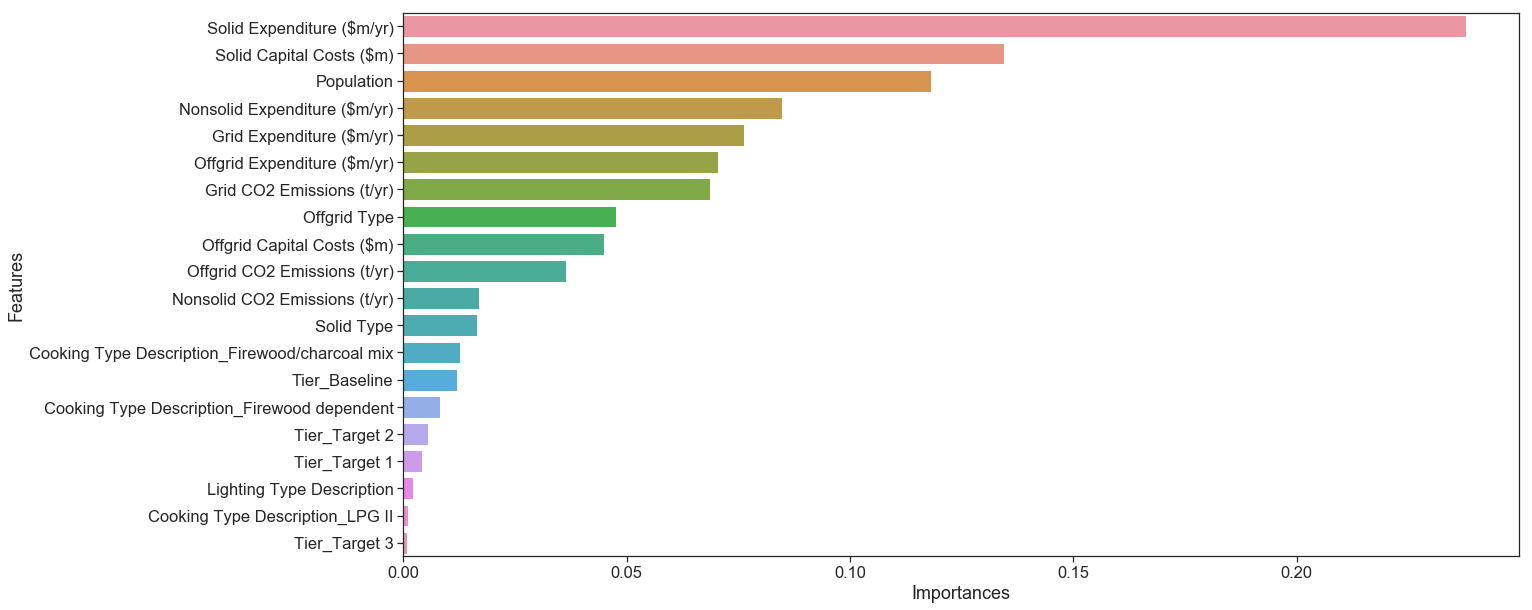

In [79]:
importances = rsearch_xgb.best_estimator_.feature_importances_
features = X_train_scaled.columns
importances_df =pd.DataFrame({'Features': features, 
                              'Importances': importances}).sort_values('Importances', ascending=False)
# Bar plot
plt.figure(figsize = (20,10))
sns.barplot(data = importances_df,  x = 'Importances', y = 'Features')

## 4. Prediction on the Test Set

### A. Random forest

In [89]:
# XGBoost test prediction
model_rf = rsearch_rf.best_estimator_
rf_prediction = Test_prediction(model_rf, X_train_prepared, y_train,X_test_prepared, y_test)
rf_prediction[0]

Test mae score: 0.0478178845421


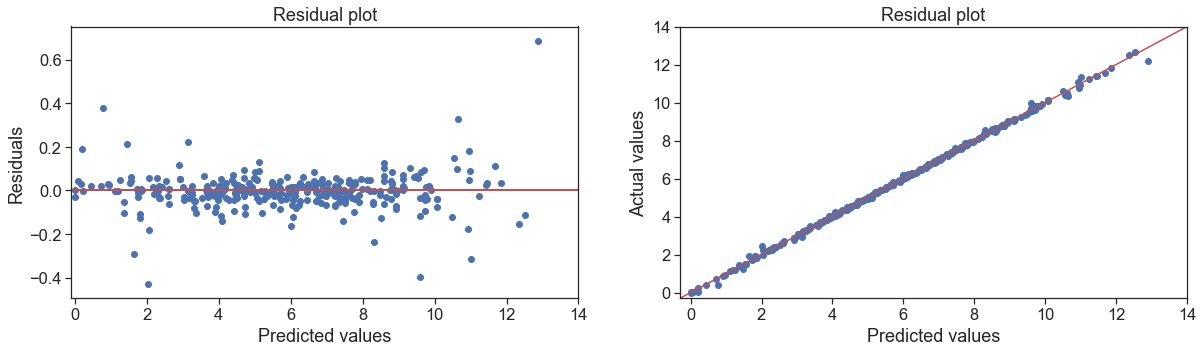

In [90]:
y_pred, y_true = rf_prediction[1], y_test
Diagnostic_Plot(y_pred, y_true)

### B. XGBoost

In [91]:
# XGBoost test prediction
model_xgb = rsearch_xgb.best_estimator_
xgb_prediction = Test_prediction(model_xgb, X_train_prepared, y_train,X_test_prepared, y_test)
xgb_prediction[0]

Test mae score: 0.0522284428906


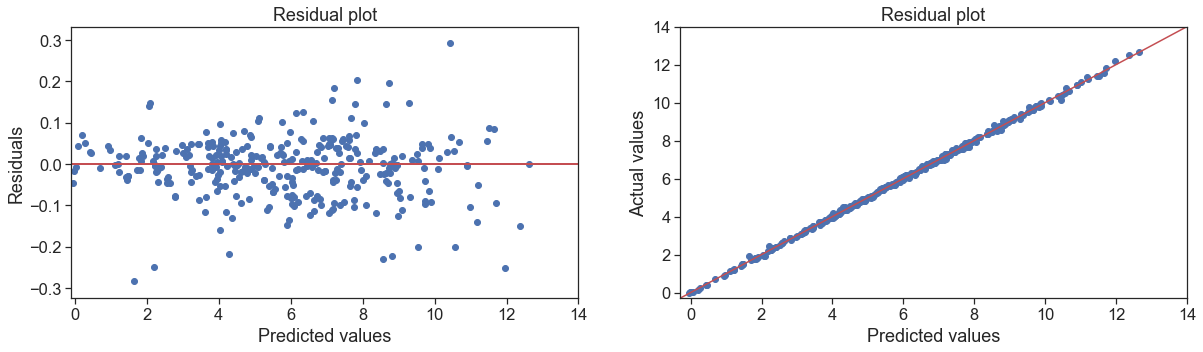

In [92]:
y_pred, y_true = xgb_prediction[1], y_test
Diagnostic_Plot(y_pred, y_true)